In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [95]:
data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


### EDA

In [96]:
# Lets check the shape first
data.shape

(614, 13)

There are 614 rows and 15 columns in the dataset

In [97]:
#Lets now check all the columns and the dtype of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Total entries the dataset for each column is 614, has three data types: float64(4), int64(1), object(8)

In [98]:
#Lets check for the total number of null values and fill those with best methods

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

With the above information we see there are null values in the columns.
1.Gender
2.Married
3.Dependents
4.Self_Employed
5.Loan Amount
6.Loan Amount Term
7.Credit History.
Will fill the na values first

**Filling of the null values with mean, median, mode method**

In [99]:
data['Gender'] =  data['Gender'].fillna(data['Gender'].mode()[0]) #Mode since it is categorical
data['Married'] =  data['Married'].fillna(data['Married'].mode()[0]) #Mode since it is categorical
data['Dependents'] =  data['Dependents'].fillna(data['Dependents'].mode()[0]) #Mode since it is categorical
data['Self_Employed'] =  data['Self_Employed'].fillna(data['Self_Employed'].mode()[0]) #Mode since it is categorical
data['LoanAmount'] =  data['LoanAmount'].fillna(data['LoanAmount'].median()) #Median since it is continuous and data is bit skewed
data['Loan_Amount_Term'] =  data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0]) #Mode since it is categorical
data['Credit_History'] =  data['Credit_History'].fillna(data['Credit_History'].mode()[0]) #Mode since it is categorical

In [100]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


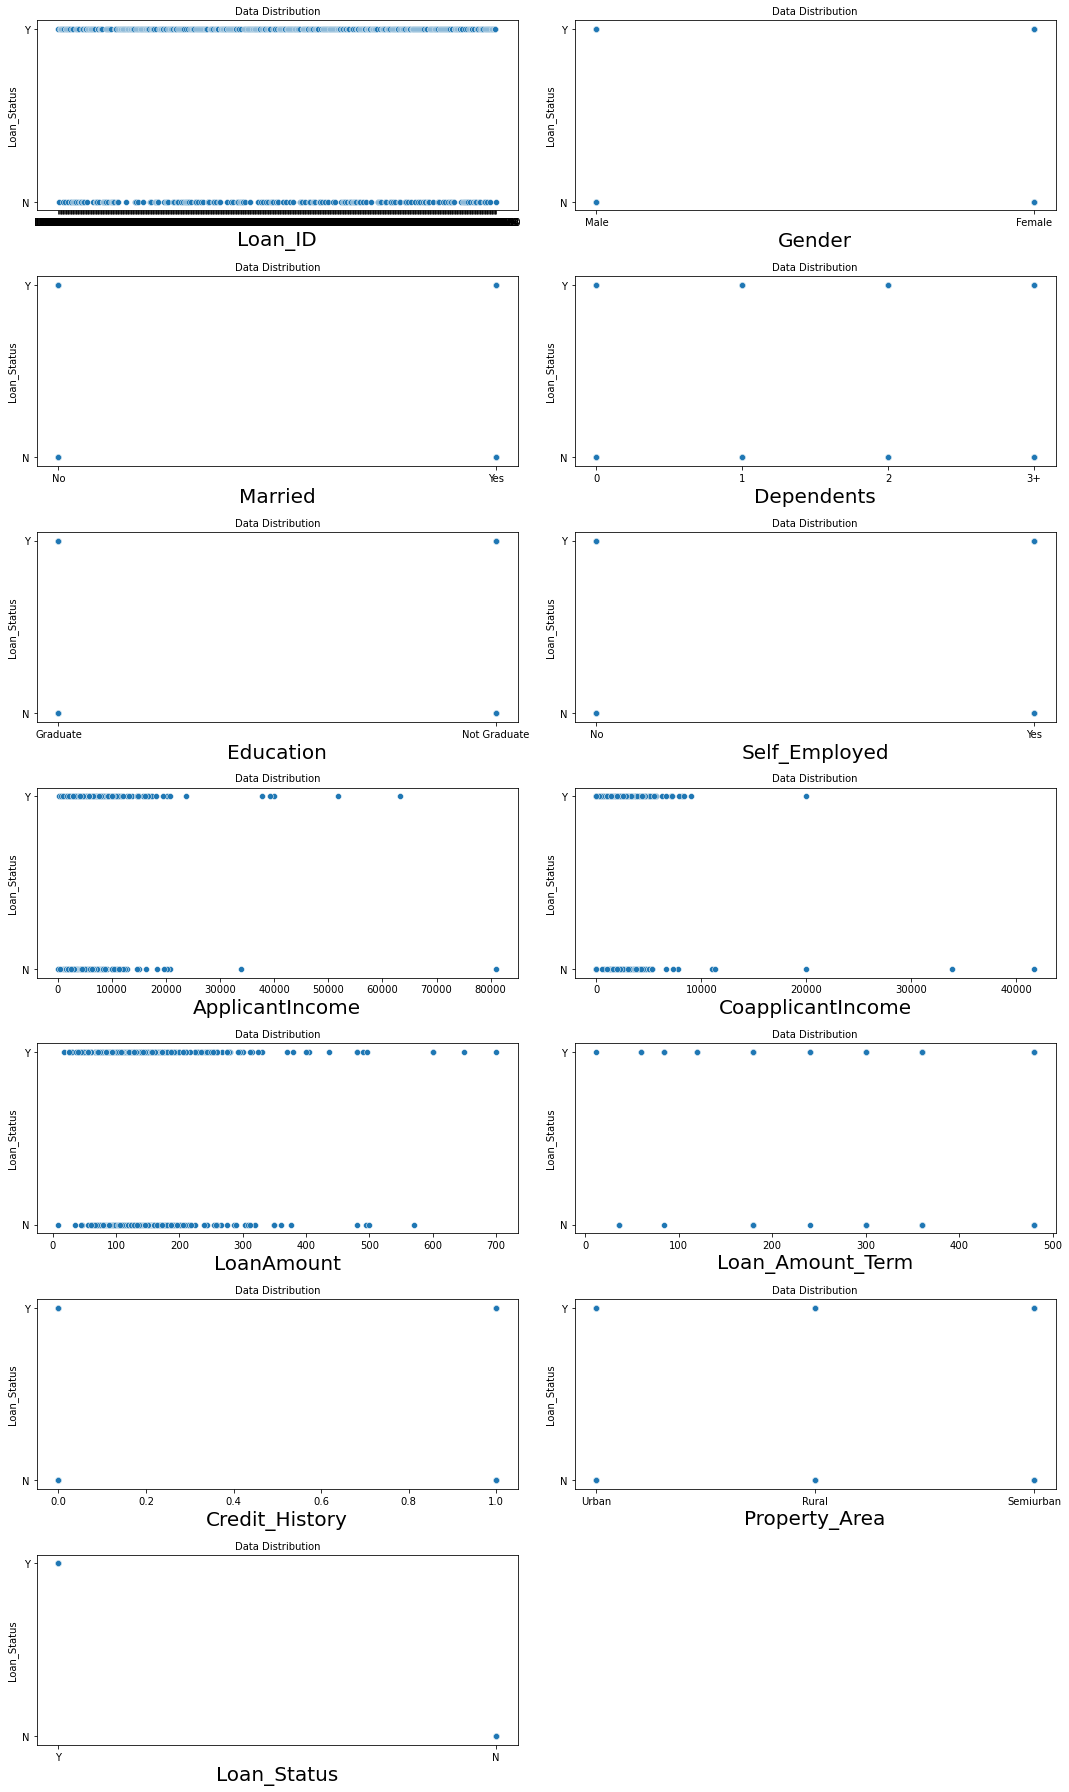

In [101]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=13:
        ax = plt.subplot(7,2,plotnumber)
        sns.scatterplot(x = data[column], y= data['Loan_Status'] )
        plt.xlabel(column, fontsize = 20)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

with the above plot lets find out what we observed.

1 - From Applicants income plot - More the income more is the chance of getting loan.

2 - From Co-applicants Income plot - More application was approved in which co-applicants income is within 20000 and as it increased the chances become less.

3 -  Loan Amount - More the loan amount more it got approved.

In [102]:
#lets see the Standard Deviation, Min Value, 25 % , 75% and maximum value of the colums

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We see the mean, standard deviation and 1st, 2nd and 3rd quartile with it.

In [103]:
#Lets drop the column loan Id as it would not be needed.
data.drop('Loan_ID',axis=1, inplace = True)
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [104]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i] = LE.fit_transform(data[i].values.reshape(-1,1))

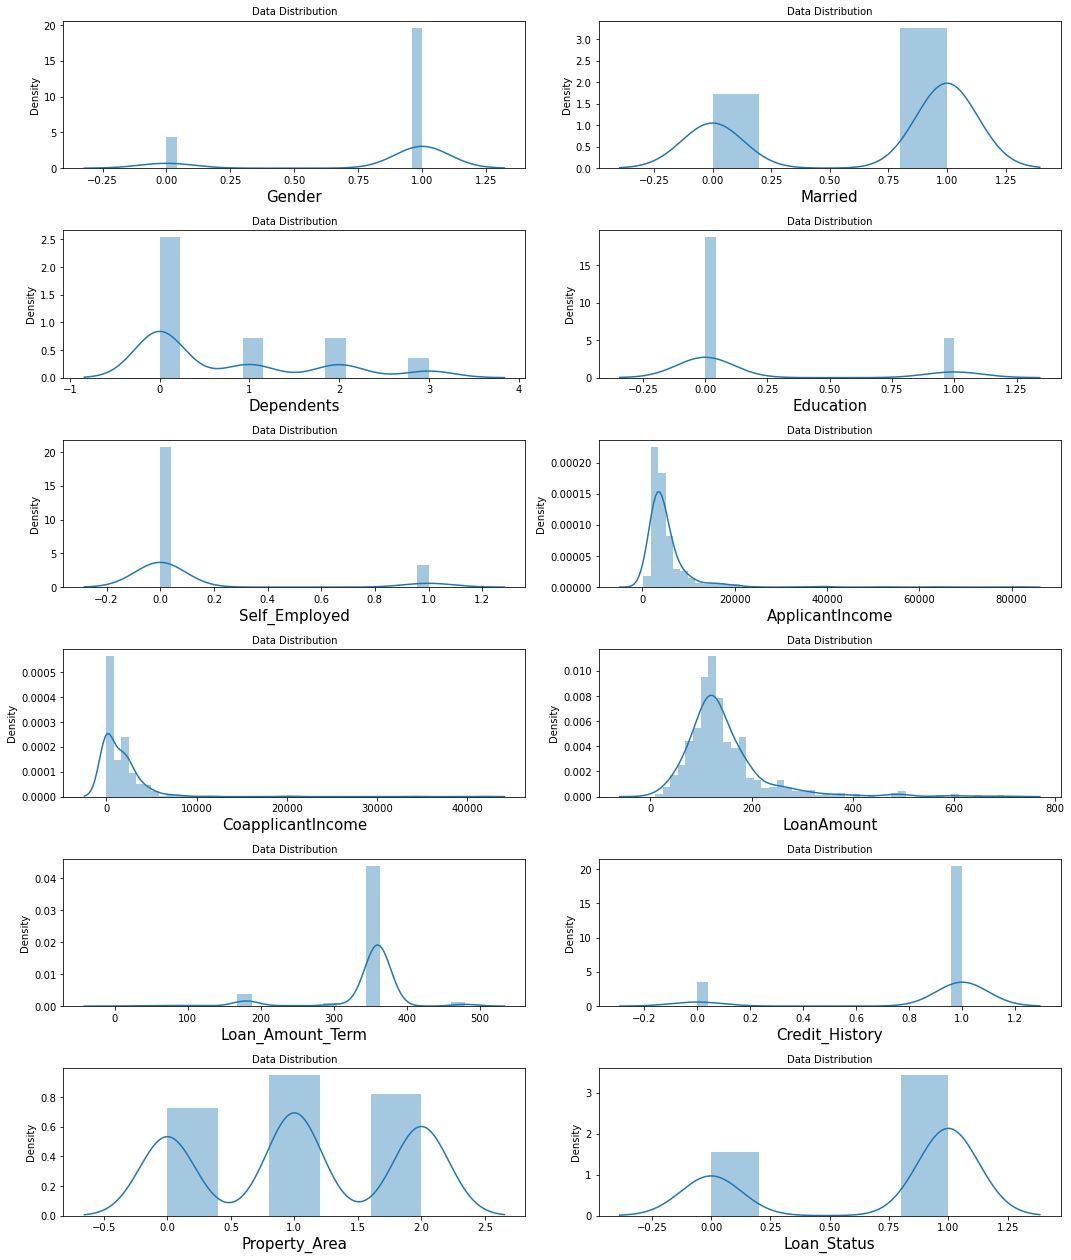

In [105]:
#Checking skewness in the data with the help of distplot

plt.figure(figsize = [15,20])
plotnumber = 1

for column in data:
    if plotnumber<=13:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(data[column],)
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [106]:
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

**This shows that there is skewness in the column**
1- CoapplicantIncome
2- ApplicantsIncome
3- LoanAmount
4- Gender
5- Married
6- Dependents
7- Education
8- Self_Employed
9- Loan_Amount_Term
10- Credit_History

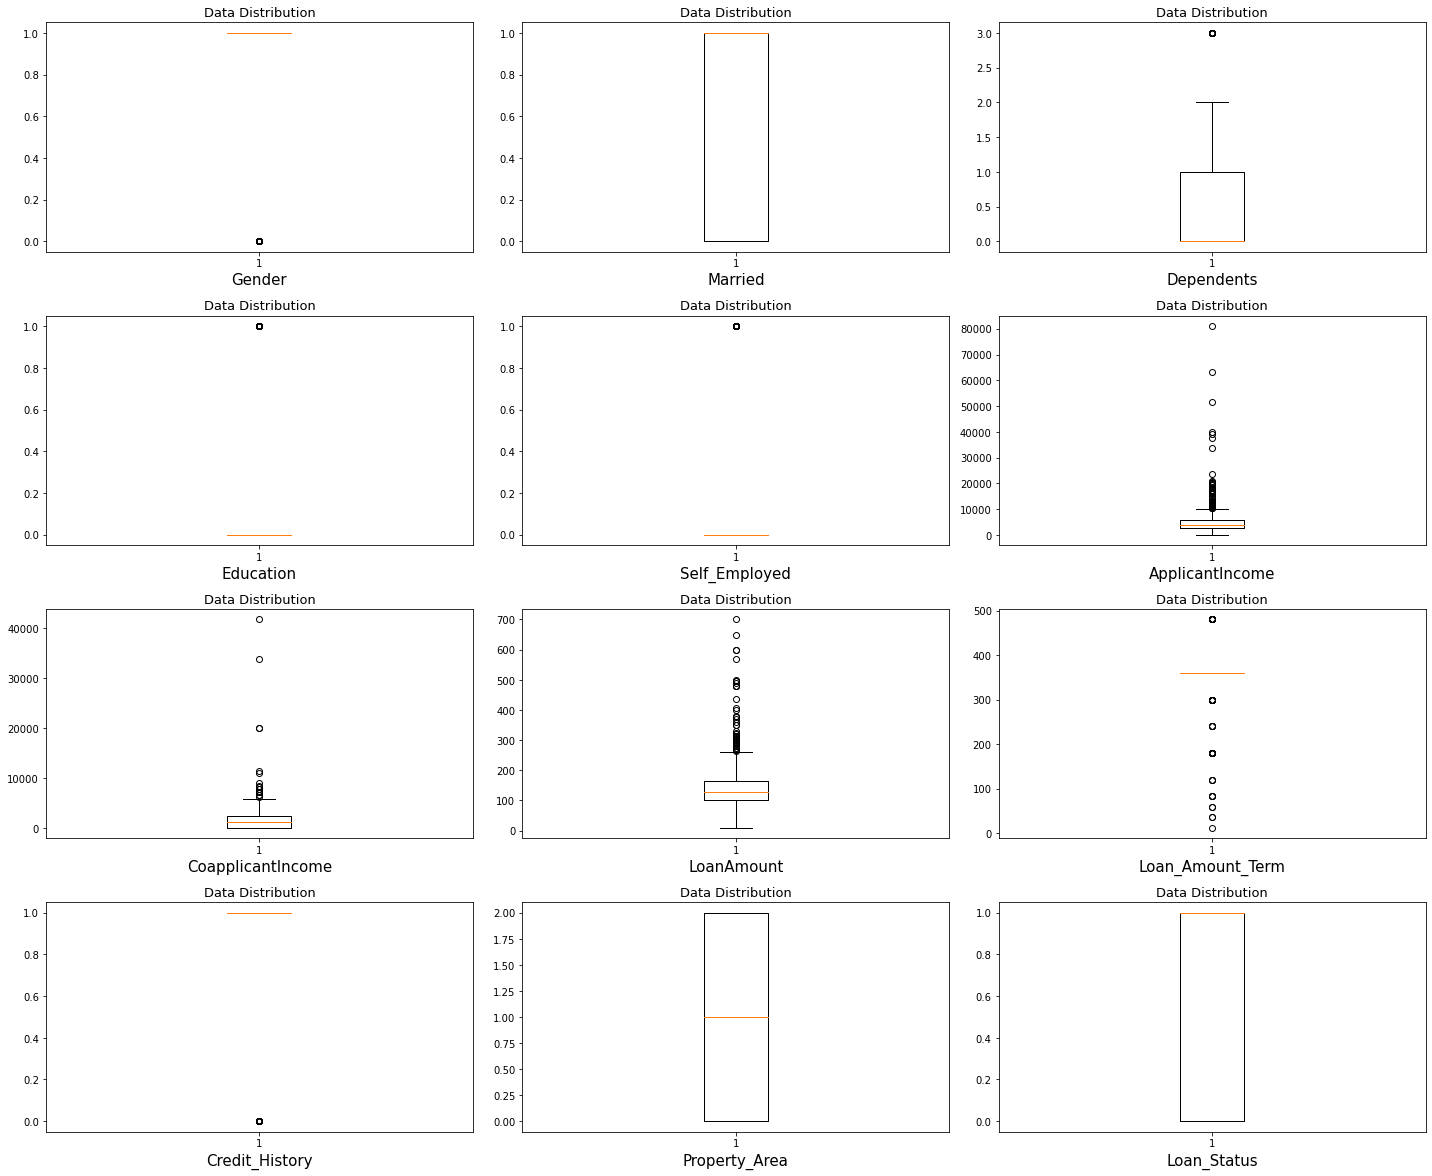

In [107]:
#Checking for outliers

plt.figure(figsize = [20,20])
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

With above observation we see there are lot of outliers in the column Loan_Amount, CoapplicantIncome, ApplicantIncome, Loan_Amount_Term

In [108]:
#Now will check the collinearity among features
corr_mat = data.corr()
corr_mat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


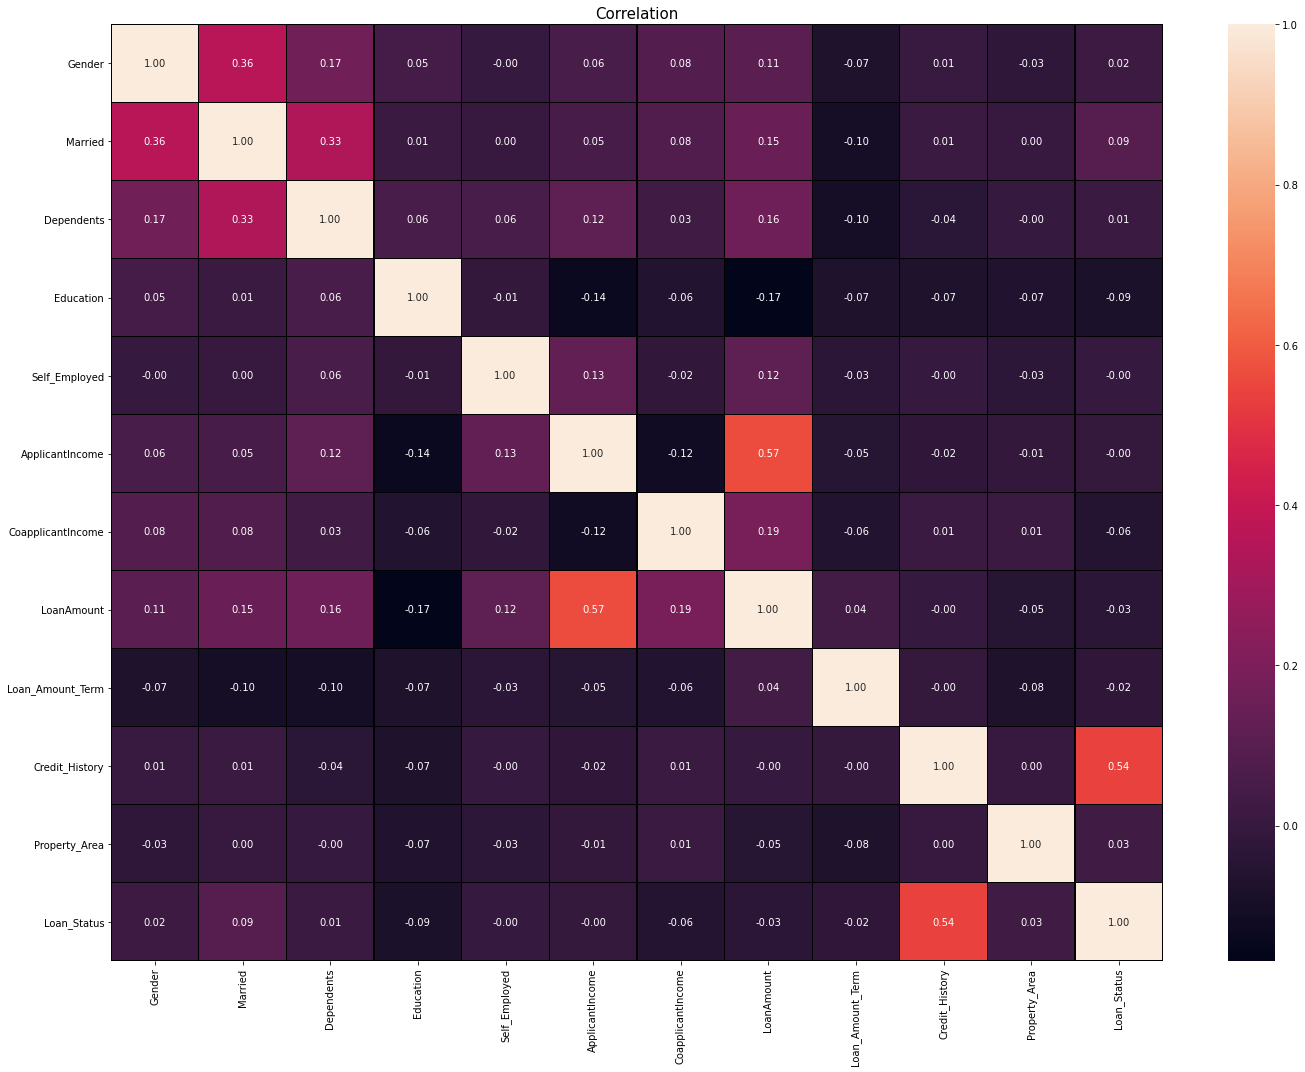

In [109]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

#### Observation from the above plot.

Max Correlation of the output with the features columns is Credit_History.

Min Correlation of the output with the features columns is with Education.

Also we can see that there are not much corelation among the features.

### Data Cleaning :

**Removing Outliers**

In [110]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.47234264 1.37208932 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.31851281 1.48253724]
 [0.47234264 0.72881553 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 ...
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 1.24474546 ... 0.41173269 1.22329839 0.67451931]
 [2.11710719 1.37208932 0.73780632 ... 2.42876026 0.04760721 1.48253724]]

 Row Numbers ==> [  9  14  68  94 126 130 133 155 155 171 171 177 177 183 185 242 262 278
 308 313 333 333 369 402 409 417 432 443 487 495 497 506 523 525 546 561
 575 581 585 600 604]

 Column Numbers ==> [6 8 8 8 5 7 8 5 7 5 7 6 7 5 5 8 8 7 7 8 5 7 7 6 5 6 7 5 7 8 8 7 7 7 8 7 8
 6 8 6 7]


In [111]:
##Storing the zcore > 3 in index

index = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

New_df = data.drop(data.index[index])

In [112]:
New_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


**Removing Skewness**

In [113]:
q = New_df['ApplicantIncome'].quantile(0.97)
New_df = New_df[New_df['ApplicantIncome']<q]

q = New_df['CoapplicantIncome'].quantile(0.96)
New_df = New_df[New_df['CoapplicantIncome']<q]

q = New_df['LoanAmount'].quantile(0.98)
New_df = New_df[New_df['LoanAmount']<q]


In [114]:
#Separating label and features

x = New_df.drop(['Loan_Status'], axis = 1)
y = New_df['Loan_Status']

### Model Building:

In [36]:
#Data is now cleaned, skewness and outliers removed. We will now build the model.

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#Scaling the data

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [116]:
#Splitting the data into train and test

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 1000, stratify = y)

In [119]:
#Model Building

In [120]:
##Lets see which model will give the best output

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [122]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [123]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [124]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [125]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.652981029810298

In [126]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

0.6195121951219512

In [127]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

0.6906504065040651

In [128]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.6651761517615176

In [129]:
#For support vectore classifier
roc_auc_score(y_test,svc.predict(x_test))

0.6651761517615176

In [130]:
#Now plotting roc_auc_curve for all the columns

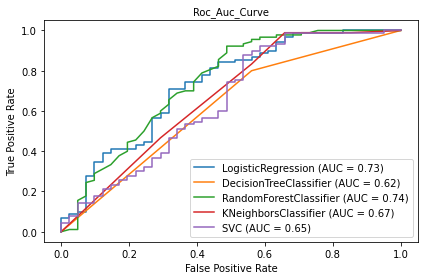

In [131]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

With above plotting we can see area covered by Random Forest Model is the most hence he will chose it further.

**Getting all the other scores for RandomForest**

In [132]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=120, random_state=1000)

In [133]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=120, random_state=1000)

In [134]:
y_pred = rf.predict(x_test)

In [135]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7786259541984732

In [136]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[15, 26],
       [ 3, 87]], dtype=int64)

In [137]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.666260162601626

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.37      0.51        41
           1       0.77      0.97      0.86        90

    accuracy                           0.78       131
   macro avg       0.80      0.67      0.68       131
weighted avg       0.79      0.78      0.75       131



**Cross Validation**

In [139]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rf,x,y,cv=5)

cvs.mean()

0.7919963369963371

Since the accuracy score and cross validation score are almost same we can say that the model is neither overfitting or underfitting

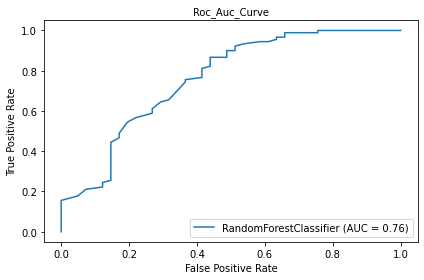

In [140]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(rf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### HyperParameter Tuning:

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
params = {'n_estimators':[100,110,120],
         'criterion':['gini','entropy'],
         'max_depth':[12,7,6],
         'min_samples_leaf': [7,6,5],
         'min_samples_split': [5,4,3]}

In [143]:
grid = GridSearchCV(rf, param_grid= params, cv = 5, n_jobs=-1)

In [144]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=120,
                                              random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 7, 6], 'min_samples_leaf': [7, 6, 5],
                         'min_samples_split': [5, 4, 3],
                         'n_estimators': [100, 110, 120]})

In [145]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}


In [146]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [147]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=5,
                       random_state=1000)

In [148]:
y_pred =  clf.predict(x_test)

In [149]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7786259541984732

In [150]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[13, 28],
       [ 1, 89]], dtype=int64)

In [151]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.652981029810298

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.32      0.47        41
           1       0.76      0.99      0.86        90

    accuracy                           0.78       131
   macro avg       0.84      0.65      0.67       131
weighted avg       0.81      0.78      0.74       131



In [153]:
##Cross Validating.

cvs = cross_val_score(clf,x,y,cv=5)

cvs.mean()

0.8206776556776557

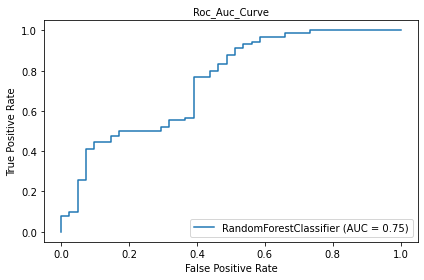

In [154]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### Model Saving :

In [157]:
#Saving the model

import joblib

filename = 'Loan Status Prediction.sav'
joblib.dump(clf, filename)

['Loan Status Prediction.sav']